In [20]:
library(ggplot2)
library(dplyr)
library(ggplot2)
library(plyr)
library(reshape)
library(ISLR2)
options(warn=-1)
library(dvmisc)
library(splines)

In [2]:
bikedata = read.csv("Bike-Sharing-Dataset//hour.csv", header = TRUE)
bikedata$dteday = as.Date(bikedata$dteday, format = "%Y-%m-%d")
attach(bikedata)
dim(bikedata)

[1] 17379    17

In [23]:
head(bikedata)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [37]:
# Create new data frame with rows between hours 1 and 4 for Dec, Jan, Feb
temp1 <- bikedata %>%
  filter(hr >= 1 & hr <= 4 & mnth %in% c(12, 1, 2))

# Calculate mean and variance of cnt variable for new data frame
mean_cnt <- mean(temp1$cnt)
var_cnt <- var(temp1$cnt)

# Print the results
cat("Mean (1am - 4am in Dec, Jan, Feb):", mean_cnt, "\n")
cat("Variance (1am - 4am in Dec, Jan, Feb):", var_cnt, "\n")

Mean (1am - 4am in Dec, Jan, Feb): 12.10479 
Variance (1am - 4am in Dec, Jan, Feb): 284.7236 


In [38]:
# Create new data frame with rows between hours 6-9 for Apr, May, June
temp2 <- bikedata %>%
  filter(hr >= 6 & hr <= 9 & mnth %in% c(4, 5, 6))

# Calculate mean and variance of cnt variable for new data frame
mean_cnt <- mean(temp2$cnt)
var_cnt <- var(temp2$cnt)

# Print the results
cat("Mean of cnt for hours 6-9 in Apr, May, Jun:", mean_cnt, "\n")
cat("Variance of cnt for hours 6-9 in Apr, May, Jun:", var_cnt, "\n")


Mean of cnt for hours 6-9 in Apr, May, Jun: 238.0165 
Variance of cnt for hours 6-9 in Apr, May, Jun: 32062.56 


In [44]:
# # Load data
# your_data_frame <- read.csv("your_data.csv")

# # Filter for months of interest
# months_of_interest <- c(12, 1, 2)  # December, January, February
# your_data_frame_filtered <- your_data_frame[your_data_frame$mnth %in% months_of_interest & your_data_frame$hr >= 1 & your_data_frame$hr <= 4,]

# Calculate variance for each month
month_var <- tapply(bikedata$cnt, bikedata$b
                    mnth, var)
month_var <- data.frame(mnth = names(month_var), var_cnt = month_var, row.names = NULL)
month_var

mnth,var_cnt
<chr>,<dbl>
1,9981.438
2,12653.227
3,26746.329
4,32810.940
5,35239.361
6,38431.270
7,35150.177
8,40178.057
9,46057.251


In [47]:
month_summary <- aggregate(cnt ~ mnth, bikedata, function(x) c(mean = mean(x), var = var(x)))
month_summary <- data.frame(month_summary[,1], month_summary[,2])
names(month_summary) <- c("mnth", "mean_cnt", "var_cnt")
                           month_summary

mnth,mean_cnt,var_cnt
<int>,<dbl>,<dbl>
1,94.42477,9981.438
2,112.86503,12653.227
3,155.41073,26746.329
4,187.26096,32810.940
5,222.90726,35239.361
6,240.51528,38431.270
7,231.81989,35150.177
8,238.09763,40178.057
9,240.77314,46057.251


`geom_smooth()` using formula = 'y ~ x'


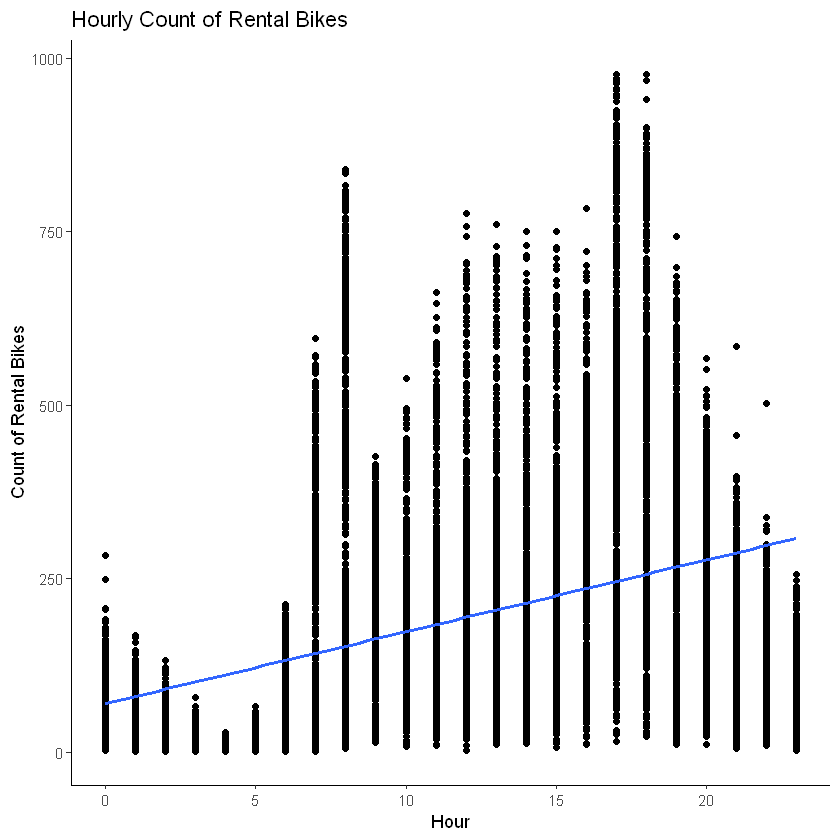

In [25]:
ggplot(bikedata, aes(x = hr, y = cnt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Hour", y = "Count of Rental Bikes", title = "Hourly Count of Rental Bikes") +
  theme_classic()


In [4]:
mydata = bikedata %>% 
         select(cnt, season, yr, mnth, hr, holiday, weekday, weathersit, temp, dteday)
head(mydata)

,cnt,season,yr,mnth,hr,holiday,weekday,weathersit,temp,dteday
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<date>
1,16,1,0,1,0,0,6,1,0.24,2011-01-01
2,40,1,0,1,1,0,6,1,0.22,2011-01-01
3,32,1,0,1,2,0,6,1,0.22,2011-01-01
4,13,1,0,1,3,0,6,1,0.24,2011-01-01
5,1,1,0,1,4,0,6,1,0.24,2011-01-01
6,1,1,0,1,5,0,6,2,0.24,2011-01-01


## Test-Train split

In [5]:
set.seed(2023)
sample.index <- sample(nrow(mydata),nrow(mydata)*0.80, replace = FALSE)
bike.train <- mydata[sample.index,]
bike.test <- mydata[-sample.index,]

## Before converting variables to factors

In [6]:
modlm1 = lm(cnt~., data=bike.train)
# summary(modlm1)
(yhat_modlm1 <- round(predict(modlm1, bike.test[,-1], type="response")))
min(yhat_modlm1)
(mse1 = mean((yhat_modlm1-bike.test[,1])^2))
# (data1 <- data.frame(pred = predict(modlm1), actual = mydata$cnt))
# get_mse(modlm1)
# cat("MSE:", get_mse(modlm1))
# cat("\nBIC:" ,BIC(modlm1))

10    20    37    41    42    48    55    58    85    89   104   110   115 
   78   145    82   141   129   -49    16    62   125   144    78   128   162 
  118   132   134   138   142   151   165   167   172   175   178   200   204 
  -41   115   134   137   -36    47   -77   -36    16    77    99    75    95 
  207   208   215   218   222   225   231   238   239   252   253   256   257 
  116   126   -41   -35    26    53   119   -39   -30    62    72   -92   -83 
  260   261   268   270   272   280   282   286   292   295   298   304   306 
  -21    -6    77   101   114   -50   -31     6    85   107   123   -59   -31 
  308   312   316   317   336   342   351   357   362   369   378   380   381 
  -13    48   103   106    56   120   -26    18    76   117   -70   -57   -48 
  386   394   416   418   420   422   432   439   443   444   445   451   455 
    4    45     3    27    58   134   -35    18    45    60    64   141   144 
  456   466   480   481   488   493   494   496   500   502   505   506   509 
  -66    42   -95  -114   -12    52    67    86   105   117  -100   -90   -36 
  524   528   542   545   546   547   550   556   558   562   568   573   574 
  103   -82    77   105   114    96   -90   -25    11    72   137   -64   -88 
  588   589   594   598   612   635   638   642   645   647   652   658   662 
   99   108   143   -62   116   119   129   -79   -57   -39    41   120   111 
  665   676   678   682   683   688   696   704   705   706   710   713   747 
  -81    -3    16    53    62   108   -46    79    88    97   129   -91    63 
  749   755   760   768   773   787   788   795   796   814   816   817   823 
   87   137   -76    19    89   -53   -43    27    37    26    62    77   138 
  835   836   841   842   847   852   853   856   858   877   878   879   891 
  -12    -8    73    61   107   169   157   -47    -1   134   -83   -73    76 
  900   901   905   906   907   908   909   913   915   917   921   925   953 
   92  -124   -56   -47   -16    -6     9    64    88   101   126   -69    -5 
  960   961   962   965   970   971   979   982   985   988   992   994   995 
  125   134   144   154   -63   -53    59   111   123   172   209     2     6 
  998   999  1004  1005  1015  1024  1036  1040  1042  1047  1053  1056  1059 
   22    37   136   157   185    16   145   -49   -55    -3   151   179   183 
 1067  1073  1074  1076  1081  1082  1088  1093  1095  1098  1112  1119  1124 
   20    93    92   168   186   206    30    48    61   122    38    79   143 
 1126  1127  1129  1130  1131  1133  1137  1138  1147  1149  1150  1154  1161 
  162   171   166   169   172   185   -35   -31    97   121   130   134   -43 
 1164  1176  1177  1188  1190  1194  1196  1198  1199  1200  1206  1209  1221 
    8    66    75    51    75   112   125   131   141   -76   -17    35   157 
 1226  1227  1233  1235  1254  1266  1272  1279  1286  1287  1289  1297  1298 
  -28    -9    54    90    16   165   -17    44   154   157   164   -19     0 
 1299  1302  1304  1310  1321  1327  1331  1337  1340  1347  1349  1352  1354 
    9    55   103   158    19    77    96   155   -23    36    72   112   136 
 1355  1358  1371  1376  1377  1386  1389  1394  1395  1396  1398  1411  1421 
  145   161    56   173   188   -37   -21     8    23    38    68   -71    79 
 1435  1439  1454  1460  1461  1463  1464  1493  1497  1512  1513  1514  1517 
  -33     4   185   -11     5    32    14    98   140    24    45    39    90 
 1524  1527  1528  1529  1531  1536  1541  1550  1551  1552  1555  1557  1568 
  165   181   -36   -26   -14     5    75   130   145   -65   -13    12   131 
 1572  1576  1578  1581  1582  1589  1593  1594  1601  1607  1632  1640  1643 
  166   -44    27    49    37   113   166   148     3    82   125   157   167 
 1647  1664  1665  1667  1674  1676  1677  1680  1681  1683  1688  1692  1695 
  -15   175   178   -23    34    42    57    97   106   119   153   -32     2 
 1696  1698  1702  1709  1712  1715  1716  1724  1731

[1] -124

[1] 21089.62

In [7]:
mydata$mnth = factor(mydata$mnth)
mydata$hr = factor(mydata$hr)
mydata$weathersit = factor(mydata$weathersit)
mydata$season = factor(mydata$season)
# mydata$weekday = factor(mydata$weekday)

## After converting variables to factors (lower MSE and BIC score)

In [8]:
modlm2 = lm(cnt~., data=bike.train)
summary(modlm2)
(yhat_modlm2 <- round(predict(modlm2, bike.test[,-1], type="response")))
min(yhat_modlm2)
(mse2 = mean((yhat_modlm2-bike.test[,1])^2))
# cat("MSE:", get_mse(modlm2))
# cat("\nBIC:" ,BIC(modlm2))


Call:
lm(formula = cnt ~ ., data = bike.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-353.29  -96.49  -25.77   64.57  631.59 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4976.5615  2102.4348   2.367  0.01794 *  
season        16.2415     2.0756   7.825 5.44e-15 ***
yr           210.7712    51.4939   4.093 4.28e-05 ***
mnth           9.1480     4.3460   2.105  0.03532 *  
hr             9.2463     0.1811  51.055  < 2e-16 ***
holiday      -22.1995     7.4708  -2.972  0.00297 ** 
weekday        2.7679     0.6207   4.459 8.28e-06 ***
weathersit   -27.7473     1.9506 -14.225  < 2e-16 ***
temp         296.4124     6.9216  42.824  < 2e-16 ***
dteday        -0.3399     0.1406  -2.419  0.01559 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 146 on 13893 degrees of freedom
Multiple R-squared:  0.3561,	Adjusted R-squared:  0.3557 
F-statistic: 853.7 on 9 and 13893 DF,  p-value: < 2.2e-16


10    20    37    41    42    48    55    58    85    89   104   110   115 
   78   145    82   141   129   -49    16    62   125   144    78   128   162 
  118   132   134   138   142   151   165   167   172   175   178   200   204 
  -41   115   134   137   -36    47   -77   -36    16    77    99    75    95 
  207   208   215   218   222   225   231   238   239   252   253   256   257 
  116   126   -41   -35    26    53   119   -39   -30    62    72   -92   -83 
  260   261   268   270   272   280   282   286   292   295   298   304   306 
  -21    -6    77   101   114   -50   -31     6    85   107   123   -59   -31 
  308   312   316   317   336   342   351   357   362   369   378   380   381 
  -13    48   103   106    56   120   -26    18    76   117   -70   -57   -48 
  386   394   416   418   420   422   432   439   443   444   445   451   455 
    4    45     3    27    58   134   -35    18    45    60    64   141   144 
  456   466   480   481   488   493   494   496   500   502   505   506   509 
  -66    42   -95  -114   -12    52    67    86   105   117  -100   -90   -36 
  524   528   542   545   546   547   550   556   558   562   568   573   574 
  103   -82    77   105   114    96   -90   -25    11    72   137   -64   -88 
  588   589   594   598   612   635   638   642   645   647   652   658   662 
   99   108   143   -62   116   119   129   -79   -57   -39    41   120   111 
  665   676   678   682   683   688   696   704   705   706   710   713   747 
  -81    -3    16    53    62   108   -46    79    88    97   129   -91    63 
  749   755   760   768   773   787   788   795   796   814   816   817   823 
   87   137   -76    19    89   -53   -43    27    37    26    62    77   138 
  835   836   841   842   847   852   853   856   858   877   878   879   891 
  -12    -8    73    61   107   169   157   -47    -1   134   -83   -73    76 
  900   901   905   906   907   908   909   913   915   917   921   925   953 
   92  -124   -56   -47   -16    -6     9    64    88   101   126   -69    -5 
  960   961   962   965   970   971   979   982   985   988   992   994   995 
  125   134   144   154   -63   -53    59   111   123   172   209     2     6 
  998   999  1004  1005  1015  1024  1036  1040  1042  1047  1053  1056  1059 
   22    37   136   157   185    16   145   -49   -55    -3   151   179   183 
 1067  1073  1074  1076  1081  1082  1088  1093  1095  1098  1112  1119  1124 
   20    93    92   168   186   206    30    48    61   122    38    79   143 
 1126  1127  1129  1130  1131  1133  1137  1138  1147  1149  1150  1154  1161 
  162   171   166   169   172   185   -35   -31    97   121   130   134   -43 
 1164  1176  1177  1188  1190  1194  1196  1198  1199  1200  1206  1209  1221 
    8    66    75    51    75   112   125   131   141   -76   -17    35   157 
 1226  1227  1233  1235  1254  1266  1272  1279  1286  1287  1289  1297  1298 
  -28    -9    54    90    16   165   -17    44   154   157   164   -19     0 
 1299  1302  1304  1310  1321  1327  1331  1337  1340  1347  1349  1352  1354 
    9    55   103   158    19    77    96   155   -23    36    72   112   136 
 1355  1358  1371  1376  1377  1386  1389  1394  1395  1396  1398  1411  1421 
  145   161    56   173   188   -37   -21     8    23    38    68   -71    79 
 1435  1439  1454  1460  1461  1463  1464  1493  1497  1512  1513  1514  1517 
  -33     4   185   -11     5    32    14    98   140    24    45    39    90 
 1524  1527  1528  1529  1531  1536  1541  1550  1551  1552  1555  1557  1568 
  165   181   -36   -26   -14     5    75   130   145   -65   -13    12   131 
 1572  1576  1578  1581  1582  1589  1593  1594  1601  1607  1632  1640  1643 
  166   -44    27    49    37   113   166   148     3    82   125   157   167 
 1647  1664  1665  1667  1674  1676  1677  1680  1681  1683  1688  1692  1695 
  -15   175   178   -23    34    42    57    97   106   119   153   -32     2 
 1696  1698  1702  1709  1712  1715  1716  1724  1731

[1] -124

[1] 21089.62

## Best subset selection for model with factors

In [9]:
aic_back <- step(modlm2, direction="backward", trace= FALSE) # by default direction is "backward", trace = TRUE
summary(aic_back)


Call:
lm(formula = cnt ~ season + yr + mnth + hr + holiday + weekday + 
    weathersit + temp + dteday, data = bike.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-353.29  -96.49  -25.77   64.57  631.59 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4976.5615  2102.4348   2.367  0.01794 *  
season        16.2415     2.0756   7.825 5.44e-15 ***
yr           210.7712    51.4939   4.093 4.28e-05 ***
mnth           9.1480     4.3460   2.105  0.03532 *  
hr             9.2463     0.1811  51.055  < 2e-16 ***
holiday      -22.1995     7.4708  -2.972  0.00297 ** 
weekday        2.7679     0.6207   4.459 8.28e-06 ***
weathersit   -27.7473     1.9506 -14.225  < 2e-16 ***
temp         296.4124     6.9216  42.824  < 2e-16 ***
dteday        -0.3399     0.1406  -2.419  0.01559 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 146 on 13893 degrees of freedom
Multiple R-squared:  0.3561,	Adjusted R-squared:

## GLM - Poisson

In [10]:
modglm1 = glm(cnt~., data=bike.train, family=poisson)
summary(modglm1)
(yhat_modglm1 <- round(predict(modlm2, bike.test[,-1], type="response")))
min(yhat_modglm1)
(mse3 = mean((yhat_modglm1-bike.test[,1])^2))
# cat("MSE:", get_mse(modglm1))
# cat("\nBIC:" ,BIC(modglm1))


Call:
glm(formula = cnt ~ ., family = poisson, data = bike.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-27.025   -9.211   -2.667    4.395   35.079  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.389e+01  1.047e+00   32.37   <2e-16 ***
season       1.068e-01  1.249e-03   85.47   <2e-16 ***
yr           1.217e+00  2.563e-02   47.50   <2e-16 ***
mnth         5.905e-02  2.137e-03   27.62   <2e-16 ***
hr           5.170e-02  9.588e-05  539.23   <2e-16 ***
holiday     -1.421e-01  4.045e-03  -35.12   <2e-16 ***
weekday      1.270e-02  3.108e-04   40.87   <2e-16 ***
weathersit  -1.475e-01  1.068e-03 -138.10   <2e-16 ***
temp         1.617e+00  3.485e-03  463.87   <2e-16 ***
dteday      -2.041e-03  6.999e-05  -29.16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2325429  on 13902  degrees of freedom
Residual deviance

10    20    37    41    42    48    55    58    85    89   104   110   115 
   78   145    82   141   129   -49    16    62   125   144    78   128   162 
  118   132   134   138   142   151   165   167   172   175   178   200   204 
  -41   115   134   137   -36    47   -77   -36    16    77    99    75    95 
  207   208   215   218   222   225   231   238   239   252   253   256   257 
  116   126   -41   -35    26    53   119   -39   -30    62    72   -92   -83 
  260   261   268   270   272   280   282   286   292   295   298   304   306 
  -21    -6    77   101   114   -50   -31     6    85   107   123   -59   -31 
  308   312   316   317   336   342   351   357   362   369   378   380   381 
  -13    48   103   106    56   120   -26    18    76   117   -70   -57   -48 
  386   394   416   418   420   422   432   439   443   444   445   451   455 
    4    45     3    27    58   134   -35    18    45    60    64   141   144 
  456   466   480   481   488   493   494   496   500   502   505   506   509 
  -66    42   -95  -114   -12    52    67    86   105   117  -100   -90   -36 
  524   528   542   545   546   547   550   556   558   562   568   573   574 
  103   -82    77   105   114    96   -90   -25    11    72   137   -64   -88 
  588   589   594   598   612   635   638   642   645   647   652   658   662 
   99   108   143   -62   116   119   129   -79   -57   -39    41   120   111 
  665   676   678   682   683   688   696   704   705   706   710   713   747 
  -81    -3    16    53    62   108   -46    79    88    97   129   -91    63 
  749   755   760   768   773   787   788   795   796   814   816   817   823 
   87   137   -76    19    89   -53   -43    27    37    26    62    77   138 
  835   836   841   842   847   852   853   856   858   877   878   879   891 
  -12    -8    73    61   107   169   157   -47    -1   134   -83   -73    76 
  900   901   905   906   907   908   909   913   915   917   921   925   953 
   92  -124   -56   -47   -16    -6     9    64    88   101   126   -69    -5 
  960   961   962   965   970   971   979   982   985   988   992   994   995 
  125   134   144   154   -63   -53    59   111   123   172   209     2     6 
  998   999  1004  1005  1015  1024  1036  1040  1042  1047  1053  1056  1059 
   22    37   136   157   185    16   145   -49   -55    -3   151   179   183 
 1067  1073  1074  1076  1081  1082  1088  1093  1095  1098  1112  1119  1124 
   20    93    92   168   186   206    30    48    61   122    38    79   143 
 1126  1127  1129  1130  1131  1133  1137  1138  1147  1149  1150  1154  1161 
  162   171   166   169   172   185   -35   -31    97   121   130   134   -43 
 1164  1176  1177  1188  1190  1194  1196  1198  1199  1200  1206  1209  1221 
    8    66    75    51    75   112   125   131   141   -76   -17    35   157 
 1226  1227  1233  1235  1254  1266  1272  1279  1286  1287  1289  1297  1298 
  -28    -9    54    90    16   165   -17    44   154   157   164   -19     0 
 1299  1302  1304  1310  1321  1327  1331  1337  1340  1347  1349  1352  1354 
    9    55   103   158    19    77    96   155   -23    36    72   112   136 
 1355  1358  1371  1376  1377  1386  1389  1394  1395  1396  1398  1411  1421 
  145   161    56   173   188   -37   -21     8    23    38    68   -71    79 
 1435  1439  1454  1460  1461  1463  1464  1493  1497  1512  1513  1514  1517 
  -33     4   185   -11     5    32    14    98   140    24    45    39    90 
 1524  1527  1528  1529  1531  1536  1541  1550  1551  1552  1555  1557  1568 
  165   181   -36   -26   -14     5    75   130   145   -65   -13    12   131 
 1572  1576  1578  1581  1582  1589  1593  1594  1601  1607  1632  1640  1643 
  166   -44    27    49    37   113   166   148     3    82   125   157   167 
 1647  1664  1665  1667  1674  1676  1677  1680  1681  1683  1688  1692  1695 
  -15   175   178   -23    34    42    57    97   106   119   153   -32     2 
 1696  1698  1702  1709  1712  1715  1716  1724  1731

[1] -124

[1] 21089.62

In [11]:
(yhat_modgml1 <- round(predict(modglm1, bike.test[,-1], type="response")))
min(yhat_modgml1)

10    20    37    41    42    48    55    58    85    89   104   110   115 
   82   120    86   118   111    41    59    76   107   120    83   109   133 
  118   132   134   138   142   151   165   167   172   175   178   200   204 
   42   102   113   116    44    70    35    44    58    82    92    82    92 
  207   208   215   218   222   225   231   238   239   252   253   256   257 
  104   109    43    45    63    73   105    43    46    77    81    32    34 
  260   261   268   270   272   280   282   286   292   295   298   304   306 
   48    52    82    94   101    41    45    55    86    97   106    38    45 
  308   312   316   317   336   342   351   357   362   369   378   380   381 
   50    70    94    96    73   104    46    59    82   104    36    39    41 
  386   394   416   418   420   422   432   439   443   444   445   451   455 
   55    69    55    63    74   112    44    59    69    75    76   117   120 
  456   466   480   481   488   493   494   496   500   502   505   506   509 
   37    67    31    28    50    71    77    86    96   103    31    33    44 
  524   528   542   545   546   547   550   556   558   562   568   573   574 
   96    34    83    97   102    93    33    47    57    80   115    38    33 
  588   589   594   598   612   635   638   642   645   647   652   658   662 
   92    97   118    38   102   103   109    35    39    43    67   105   101 
  665   676   678   682   683   688   696   704   705   706   710   713   747 
   34    53    59    73    77    99    42    84    89    93   111    33    76 
  749   755   760   768   773   787   788   795   796   814   816   817   823 
   87   115    35    60    88    40    42    63    66    62    76    83   117 
  835   836   841   842   847   852   853   856   858   877   878   879   891 
   51    52    81    76    99   139   130    42    53   114    34    36    82 
  900   901   905   906   907   908   909   913   915   917   921   925   953 
   91    27    40    42    49    52    56    76    88    94   108    37    52 
  960   961   962   965   970   971   979   982   985   988   992   994   995 
  107   112   118   125    38    40    75   100   107   141   173    54    55 
  998   999  1004  1005  1015  1024  1036  1040  1042  1047  1053  1056  1059 
   61    66   114   128   151    59   121    41    40    53   124   144   148 
 1067  1073  1074  1076  1081  1082  1088  1093  1095  1098  1112  1119  1124 
   59    89    89   135   151   167    62    70    75   105    65    82   117 
 1126  1127  1129  1130  1131  1133  1137  1138  1147  1149  1150  1154  1161 
  130   137   133   136   139   149    44    45    92   106   111   114    42 
 1164  1176  1177  1188  1190  1194  1196  1198  1199  1200  1206  1209  1221 
   55    77    81    71    82   101   108   112   118    35    49    65   129 
 1226  1227  1233  1235  1254  1266  1272  1279  1286  1287  1289  1297  1298 
   46    51    73    89    59   134    48    68   125   127   132    49    54 
 1299  1302  1304  1310  1321  1327  1331  1337  1340  1347  1349  1352  1354 
   57    73    95   130    60    83    93   129    47    66    81   100   115 
 1355  1358  1371  1376  1377  1386  1389  1394  1395  1396  1398  1411  1421 
  121   133    74   140   153    44    48    56    61    67    79    36    83 
 1435  1439  1454  1460  1461  1463  1464  1493  1497  1512  1513  1514  1517 
   45    55   150    51    56    65    59    93   118    62    69    67    89 
 1524  1527  1528  1529  1531  1536  1541  1550  1551  1552  1555  1557  1568 
  135   148    44    46    50    56    82   113   123    38    50    58   112 
 1572  1576  1578  1581  1582  1589  1593  1594  1601  1607  1632  1640  1643 
  136    42    62    70    66   101   135   123    54    84   108   130   138 
 1647  1664  1665  1667  1674  1676  1677  1680  1681  1683  1688  1692  1695 
   50   143   146    47    65    69    75    93    98   105   127    45    55 
 1696  1698  1702  1709  1712  1715  1716  1724  1731

[1] 27

In [13]:
df <- data.frame(Model = c("LM (no factors)", "LM (with factors)", "GLM (Poisson)"),
                 BIC = c(BIC(modlm1), BIC(modlm2), BIC(modglm1)),
                 MSE = c(get_mse(modlm1), get_mse(modlm2), get_mse(modglm1)))
df

Model,BIC,MSE
<chr>,<dbl>,<dbl>
LM (no factors),178116.3,2.130400e+04
LM (with factors),178116.3,2.130400e+04
GLM (Poisson),1523943.6,7.255875e-01
